In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__
# first_row = session.query(station).first()
# first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15b0620d0>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date_query = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date_query

('2017-08-23',)

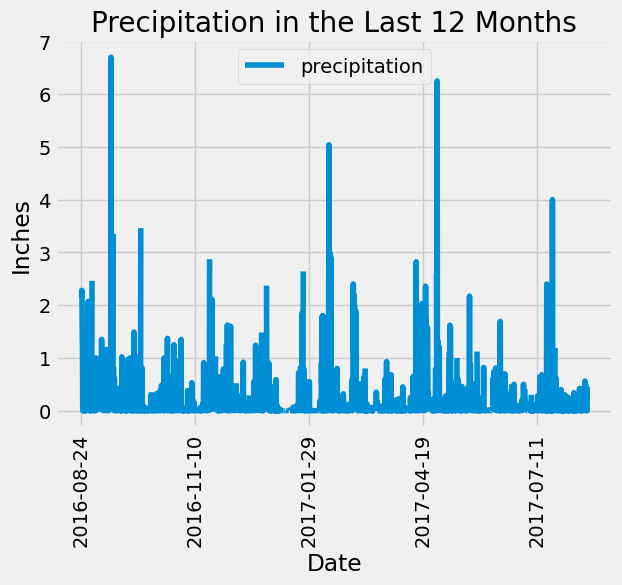

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent_date_string = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
most_recent_date = dt.datetime.strptime(most_recent_date_string, "%Y-%m-%d")

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

precipitation_df = pd.DataFrame(precipitation, columns = ['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot('date', 'precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation = 90)
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(precipitation_df['precipitation'].describe())

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations_query = session.query(station.station).count()
number_of_stations_query

9

In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_by_count_query = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).order_by(func.count(measurement.id).desc())
for station in stations_by_count_query.all():
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter_by(station = 'USC00519281')
most_active_station_stats.first()

(54.0, 85.0, 71.66378066378067)

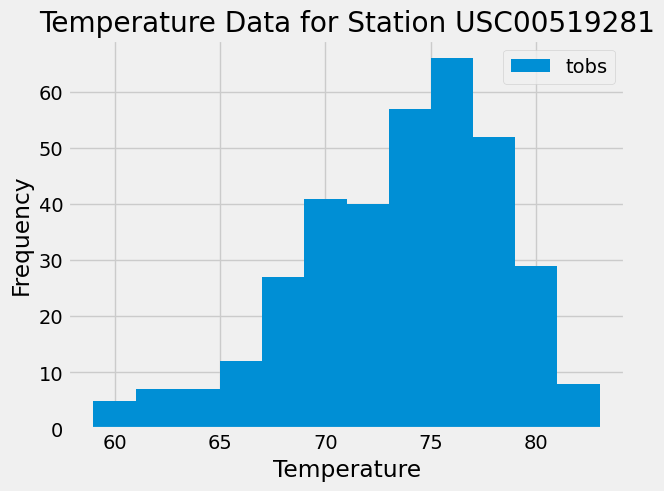

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data for more active station in the past 12 months

temperature_data = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year_ago).all()

# Extract temperature data 
temperatures = [temp[0] for temp in temperature_data]

# Use Pandas Plotting with Matplotlib to plot the data
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Data for Station USC00519281')
plt.legend()
plt.show()

# Close Session

In [35]:
# Close Session
session.close()